In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

In [2]:
dataFrame=pd.read_excel(r"C:\Users\90507\Desktop\yazılım\Github\TemelPython\7-Tensorflow\bisiklet_fiyatlari.xlsx")

In [3]:
dataFrame.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


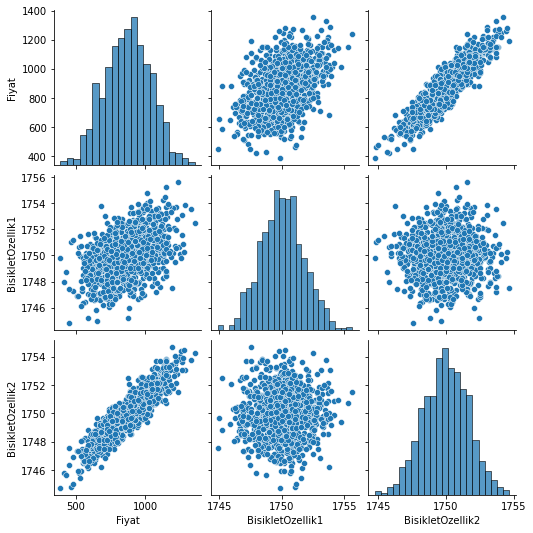

In [4]:
sbn.pairplot(dataFrame)

Veriyi test ve traine ayırmak

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
#train_test_split

X --> label --> fiyat
Y --> feature --> ozellik

In [7]:
y=dataFrame["Fiyat"].values
x=dataFrame[["BisikletOzellik1","BisikletOzellik2"]].values

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=15)

In [9]:
x_train.shape, x_test.shape,y_train.shape, y_test.shape

((670, 2), (330, 2), (670,), (330,))

Scaling 0 ile 1 arasına küçültür

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
scaler.fit(x_train)

MinMaxScaler()

In [13]:
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
model=Sequential()

model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="rmsprop",loss="mse")

In [16]:
model.fit(x_train,y_train,epochs=300)

Epoch 1/300
21/21 [==============================] - 2s 6ms/step - loss: 795630.0000
Epoch 2/300
21/21 [==============================] - 0s 4ms/step - loss: 795069.2500
Epoch 3/300
21/21 [==============================] - 0s 4ms/step - loss: 794550.7500
Epoch 4/300
21/21 [==============================] - 0s 4ms/step - loss: 793954.6250
Epoch 5/300
21/21 [==============================] - 0s 4ms/step - loss: 793279.7500
Epoch 6/300
21/21 [==============================] - 0s 3ms/step - loss: 792510.8750
Epoch 7/300
21/21 [==============================] - 0s 7ms/step - loss: 791644.3750
Epoch 8/300
21/21 [==============================] - 0s 5ms/step - loss: 790679.7500
Epoch 9/300
21/21 [==============================] - 0s 4ms/step - loss: 789609.1250
Epoch 10/300
21/21 [==============================] - 0s 5ms/step - loss: 788422.4375
Epoch 11/300
21/21 [==============================] - 0s 8ms/step - loss: 787131.2500
Epoch 12/300
21/21 [==============================] - 0s 4ms/st

In [17]:
loss=model.history.history["loss"]

<AxesSubplot:>

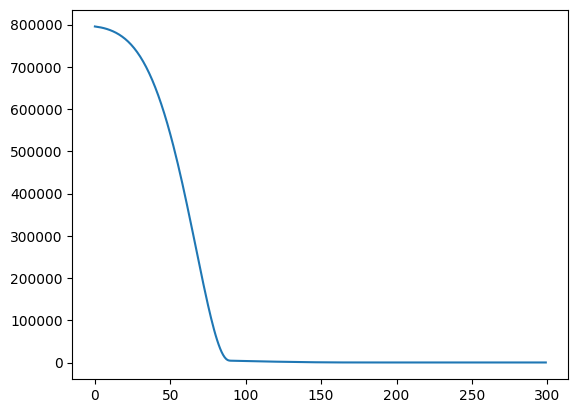

In [18]:
sbn.lineplot(x=range(len(loss)),y=loss)

In [19]:
trainLoss=model.evaluate(x_train,y_train)

21/21 [==============================] - 1s 2ms/step - loss: 73.4511


In [20]:
testsLoss=model.evaluate(x_test,y_test)

11/11 [==============================] - 0s 3ms/step - loss: 74.9092


In [21]:
testTahminleri=model.predict(x_test)

11/11 [==============================] - 0s 2ms/step


In [22]:
testTahminleri

array([[1078.6119 ],
       [ 624.0447 ],
       [ 876.65674],
       [ 894.8064 ],
       [ 900.07605],
       [ 451.54553],
       [ 931.75995],
       [ 992.1327 ],
       [ 941.8242 ],
       [1017.5126 ],
       [ 751.32043],
       [ 918.46326],
       [ 948.1517 ],
       [1055.4819 ],
       [1122.3202 ],
       [ 681.86774],
       [1127.8623 ],
       [ 651.20605],
       [1155.5258 ],
       [ 887.10095],
       [ 893.38696],
       [ 717.1155 ],
       [ 456.86087],
       [ 612.2452 ],
       [ 835.4942 ],
       [1092.036  ],
       [ 714.12195],
       [ 757.28564],
       [ 874.02527],
       [ 771.037  ],
       [ 451.28473],
       [ 783.4828 ],
       [ 728.64355],
       [ 647.0691 ],
       [ 887.2955 ],
       [ 844.30945],
       [1036.4922 ],
       [1023.55664],
       [ 845.43427],
       [ 862.7561 ],
       [ 757.53705],
       [1175.5369 ],
       [1098.4554 ],
       [1088.6483 ],
       [ 873.7028 ],
       [ 596.8098 ],
       [1146.6752 ],
       [ 973.

In [23]:
tahminDF=pd.DataFrame(y_test,columns=["gercek y"])

In [24]:
tahminDF

,gercek y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [25]:
testTahminleri=pd.Series(testTahminleri.reshape(330))

In [26]:
testTahminleri

0      1078.611938
1       624.044678
2       876.656738
3       894.806396
4       900.076050
          ...     
325    1014.287415
326     791.257568
327     766.365601
328    1168.523560
329     803.215088
Length: 330, dtype: float32

In [27]:
tahminDF=pd.concat([tahminDF,testTahminleri],axis=1)

In [28]:
tahminDF.columns=["gercek y", "tahmin y"]

In [29]:
tahminDF

,gercek y,tahmin y
0,1081.652164,1078.611938
1,622.675990,624.044678
2,889.356810,876.656738
3,902.826733,894.806396
4,897.662404,900.076050
...,...,...
325,1028.438035,1014.287415
326,789.934950,791.257568
327,758.490486,766.365601
328,1172.871659,1168.523560


<AxesSubplot:xlabel='gercek y', ylabel='tahmin y'>

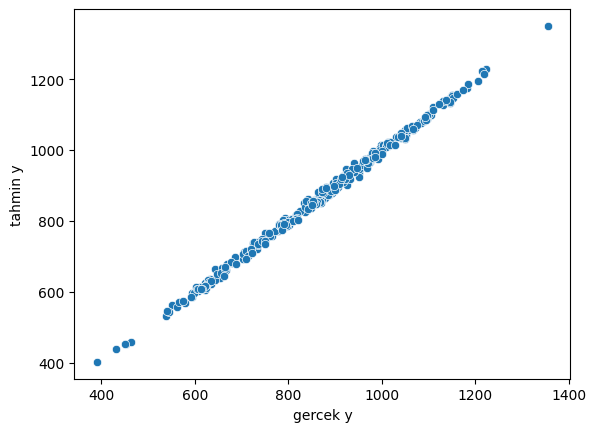

In [30]:
sbn.scatterplot(data=tahminDF, x="gercek y", y="tahmin y")

In [31]:
from sklearn.metrics import median_absolute_error, mean_squared_error

In [32]:
median_absolute_error(tahminDF["gercek y"],tahminDF["tahmin y"])

6.059356020312521

In [33]:
mean_squared_error(tahminDF["gercek y"],tahminDF["tahmin y"])

74.90922244201795

In [35]:
dataFrame.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


In [39]:
yeniBisikletOzellikleri=[[1750,1749]]

In [40]:
yeniBisikletOzellikleri=scaler.transform(yeniBisikletOzellikleri)

In [42]:
model.predict(yeniBisikletOzellikleri)

1/1 [==============================] - 0s 46ms/step


array([[786.15454]], dtype=float32)

In [43]:
from tensorflow.keras.models import load_model

In [44]:
model.save("Bisiklet_modeli.h5")

In [45]:
sonradanCagirilanModel=load_model("Bisiklet_modeli.h5")

In [46]:
sonradanCagirilanModel.predict(yeniBisikletOzellikleri)

1/1 [==============================] - 0s 299ms/step


array([[786.15454]], dtype=float32)